Financial Pressure Indicator Goldman Sachs

FPI = (▲e/e) - (Õ (▲e/e)/(Õ (▲r /r)) X (▲r /r)

Donde=

(▲e/e) = Tasa de Devaluación del Tipo de Cambio (lo hacemos a tipo oficial y blue)

(Õ (▲e/e)/(Õ (▲r /r)) = Ajuste volatilidad.

(▲r /r) = Variación de Reservas del Banco Central.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import BCRA
import yfinance as yahoo

auth_token, head = BCRA.auth_token, BCRA.head

Obtenemos la serie de Reservas

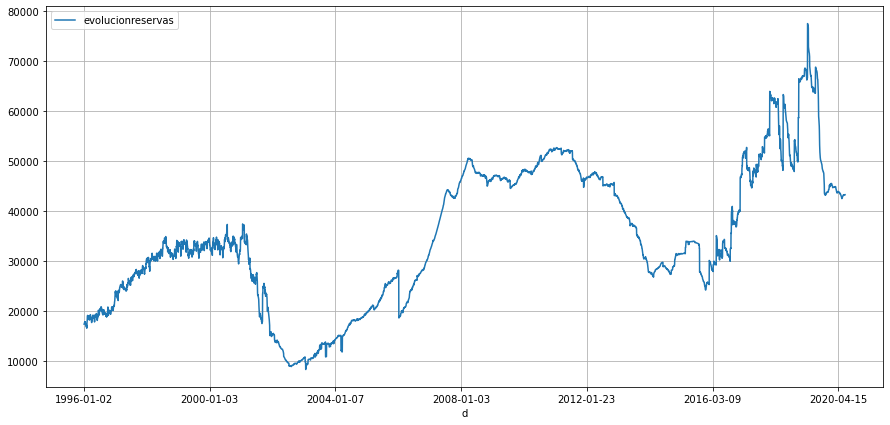

In [2]:
res = requests.get(BCRA.reserves, headers=head)
reservas = pd.DataFrame(res.json())
reservas.index = reservas.d
del reservas ['d']
reservas = reservas.rename(columns={'v':'evolucionreservas'})
re = reservas.plot(figsize=(15,7))
re.grid()

Obtenemos el TC Oficial según BCRA

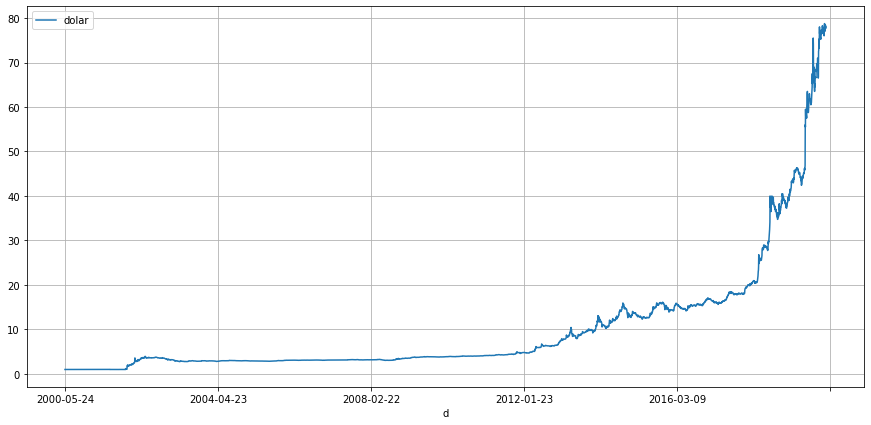

In [3]:
usd = requests.get(BCRA.usd, headers=head)
dolar = pd.DataFrame(usd.json())
dolar.index = dolar.d
del dolar ['d']
dolar = dolar.rename(columns={'v':'dolar'})
usd = dolar.plot(figsize=(15,7))
usd.grid()

[*********************100%***********************]  2 of 2 completed


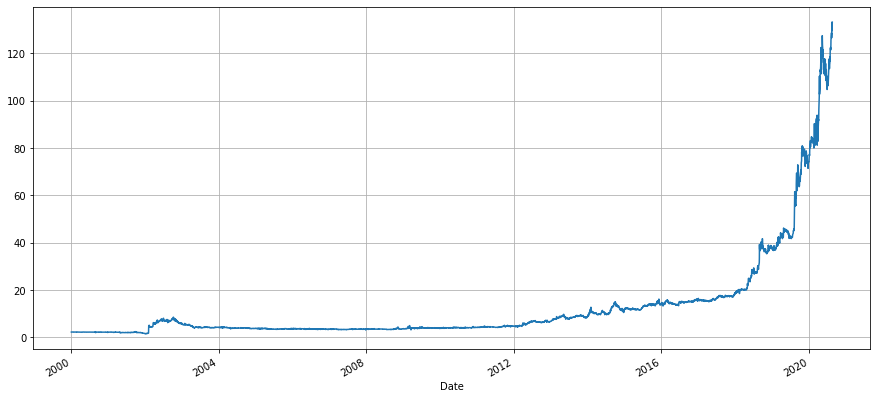

In [5]:
ypf = yahoo.download("YPF YPFD.BA",period="max")['Adj Close'].fillna(method="ffill")
ypf = ypf.dropna()
ypf = ypf.rename(columns={'YPFD.BA':'YPFDBA'})
tcypf = ypf.YPFDBA / ypf.YPF
tipoypf = tcypf.plot(figsize=(15,7))
tipoypf.grid()

Agregamos el tipo de cambio del cedear de Apple (AAPL.BA / AAPL) * 10

[*********************100%***********************]  2 of 2 completed


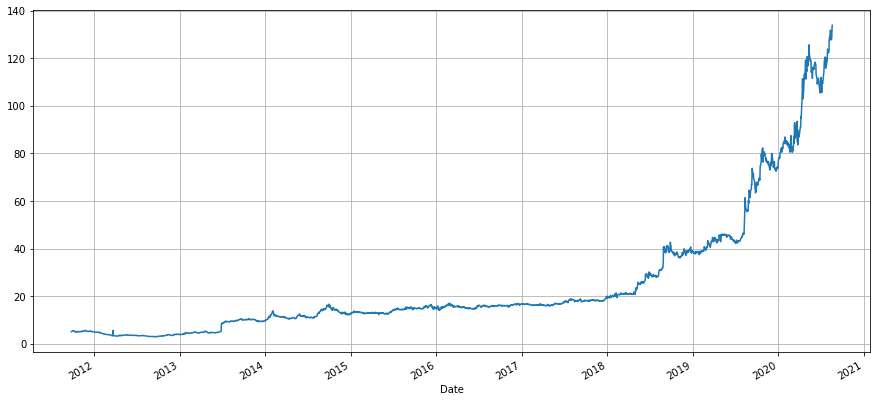

In [7]:
aapl = yahoo.download("AAPL AAPL.BA",period="10y")['Adj Close'].fillna(method="ffill")
aapl = aapl.dropna()
aapl = aapl.rename(columns={'AAPL.BA':'AAPLBA'})
tcaapl = (aapl.AAPLBA / aapl.AAPL) * 10
tipoapple = tcaapl.plot(figsize=(15,7))
tipoapple.grid()

In [20]:
#(▲e/e) = Tasa de Devaluación del Tipo de Cambio

devaluacion = dolar.dolar.pct_change() #/ dolar.dolar 

devaluacion

d
2000-05-24         NaN
2000-05-25    0.000000
2000-05-26   -0.000100
2000-05-29    0.000300
2000-05-30    0.000200
                ...   
2020-02-20    0.006410
2020-02-21   -0.006369
2020-02-26    0.003205
2020-02-27   -0.006390
2020-02-28    0.000000
Name: dolar, Length: 4975, dtype: float64

In [21]:
#(▲r /r) = Variación de Reservas del Banco Central.

peligro_reservas = reservas.evolucionreservas.pct_change() #/ reservas.evolucionreservas

peligro_reservas

d
1996-01-02         NaN
1996-01-03    0.005198
1996-01-04    0.001781
1996-01-05    0.009980
1996-01-08    0.003691
                ...   
2020-06-29    0.000023
2020-06-30    0.000949
2020-07-01   -0.000532
2020-07-02   -0.000370
2020-07-03    0.000370
Name: evolucionreservas, Length: 6055, dtype: float64

In [22]:
# Desvio Estandar del tipo de cambio y reservas

sigma_tc = dolar.dolar.pct_change().rolling(20).std()

sigma_reservas = reservas.evolucionreservas.pct_change().rolling(20).std()

sigma_tc, sigma_reservas

(d
 2000-05-24         NaN
 2000-05-25         NaN
 2000-05-26         NaN
 2000-05-29         NaN
 2000-05-30         NaN
                 ...   
 2020-02-20    0.009318
 2020-02-21    0.008383
 2020-02-26    0.008107
 2020-02-27    0.008253
 2020-02-28    0.008222
 Name: dolar, Length: 4975, dtype: float64,
 d
 1996-01-02         NaN
 1996-01-03         NaN
 1996-01-04         NaN
 1996-01-05         NaN
 1996-01-08         NaN
                 ...   
 2020-06-29    0.000902
 2020-06-30    0.000902
 2020-07-01    0.000937
 2020-07-02    0.000961
 2020-07-03    0.000919
 Name: evolucionreservas, Length: 6055, dtype: float64)

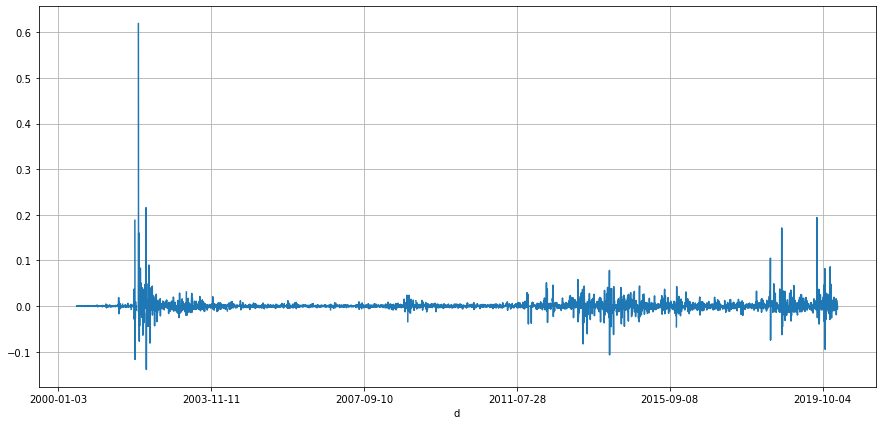

In [23]:
# Calculamos el FPI

FPI = devaluacion - (sigma_tc*(devaluacion) / sigma_reservas*(peligro_reservas)) * peligro_reservas

goldman = FPI.plot(figsize=(15,7))
goldman.grid()

FPI con Dolar Blue

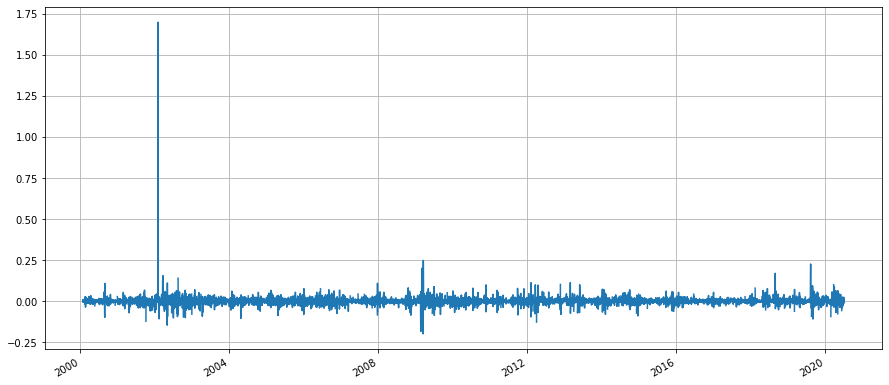

In [26]:
sigma_ypf = tcypf.pct_change().rolling(20).std()
blueypf = tcypf.pct_change()


FPI = blueypf - (sigma_ypf*(blueypf) / sigma_reservas*(peligro_reservas)) * peligro_reservas

goldman = FPI.plot(figsize=(15,7))
goldman.grid()